In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount at content/drive

In [53]:
import pandas as pd
import numpy as np
import os
import operator
import re
import sys

import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


%matplotlib inline

In [54]:
df = pd.read_csv("/content/drive/MyDrive/The Eggcellent Predictor /Data/eggprice2.csv")

In [55]:
df.head(3)

,Program,Year,Month,day,Week Ending,Geo Level,State,watershed_code,Commodity,Data Item,Domain,Domain Category,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay
0,SURVEY,2023,2,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.61,"50,031,000","181,566,000","8,225,300,000",NaN,NaN,"52,048,000","2,171"
1,SURVEY,2023,1,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,3.00,"47,370,000","188,508,000","8,225,300,000",NaN,NaN,"50,748,000","2,413"
2,SURVEY,2022,4,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.30,"53,971,000","190,571,000","8,225,300,000",NaN,NaN,"50,636,000","2,390"


In [56]:
print("Number of rows in dataset:", len(df))

Number of rows in dataset: 291


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Program             291 non-null    object 
 1   Year                291 non-null    int64  
 2   Month               291 non-null    int64  
 3   day                 291 non-null    int64  
 4   Week Ending         0 non-null      float64
 5   Geo Level           291 non-null    object 
 6   State               291 non-null    object 
 7   watershed_code      291 non-null    int64  
 8   Commodity           291 non-null    object 
 9   Data Item           291 non-null    object 
 10  Domain              291 non-null    object 
 11  Domain Category     291 non-null    object 
 12  price               291 non-null    float64
 13  chicken             135 non-null    object 
 14  broken eggs         122 non-null    object 
 15  production eggs     183 non-null    object 
 16  chicken 

 Add code here to get NULL counts per column 

In [58]:

df.isna().sum()

Program                 0
Year                    0
Month                   0
day                     0
Week Ending           291
Geo Level               0
State                   0
watershed_code          0
Commodity               0
Data Item               0
Domain                  0
Domain Category         0
price                   0
chicken               156
broken eggs           169
production eggs       108
chicken production    277
chicken died          277
Hatch chicken         157
chicken lay           108
dtype: int64

useful summary statistics

In [59]:
df.describe()

,Year,Month,day,Week Ending,watershed_code,price
count,291.000000,291.000000,291.0,0.0,291.0,291.000000
mean,2010.542955,6.484536,1.0,NaN,0.0,0.949529
std,7.014324,3.480329,0.0,NaN,0.0,0.487655
min,1998.000000,1.000000,1.0,NaN,0.0,0.446000
25%,2004.500000,3.000000,1.0,NaN,0.0,0.642500
50%,2011.000000,6.000000,1.0,NaN,0.0,0.831000
75%,2017.000000,9.500000,1.0,NaN,0.0,1.080000
max,2023.000000,12.000000,1.0,NaN,0.0,4.490000


In [60]:
df.dtypes

Program                object
Year                    int64
Month                   int64
day                     int64
Week Ending           float64
Geo Level              object
State                  object
watershed_code          int64
Commodity              object
Data Item              object
Domain                 object
Domain Category        object
price                 float64
chicken                object
broken eggs            object
production eggs        object
chicken production     object
chicken died           object
Hatch chicken          object
chicken lay            object
dtype: object

pull numeric features

In [62]:
df.dtypes

Program                object
Year                    int64
Month                   int64
day                     int64
Week Ending           float64
Geo Level              object
State                  object
watershed_code          int64
Commodity              object
Data Item              object
Domain                 object
Domain Category        object
price                 float64
chicken                object
broken eggs            object
production eggs        object
chicken production     object
chicken died           object
Hatch chicken          object
chicken lay            object
dtype: object

In [63]:
 df['broken eggs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 291 entries, 0 to 290
Series name: broken eggs
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


change data type to int and manipulate them.

In [64]:
df['chicken'] = df['chicken'].str.replace(',','')
df['chicken'] = pd.to_numeric(df['chicken'])

In [65]:
df['broken eggs'] = df['broken eggs'].str.replace(',', '')
df['broken eggs'] = pd.to_numeric(df['broken eggs'])

In [66]:
df['production eggs'] = df['production eggs'].str.replace(',', '')
df['production eggs'] = pd.to_numeric(df['production eggs'])

In [67]:
df['chicken production'] = df['chicken production'].str.replace(',', '')
df['chicken production'] = pd.to_numeric(df['chicken production'])

In [68]:
df['chicken died'] = df['chicken died'].str.replace(',', '')
df['chicken died'] = pd.to_numeric(df['chicken died'])

In [69]:

df['Hatch chicken'] = df['Hatch chicken'].str.replace(',', '')
df['Hatch chicken'] = pd.to_numeric(df['Hatch chicken'])


In [70]:
df['chicken lay'] = df['chicken lay'].str.replace(',', '')
df['chicken lay'] = pd.to_numeric(df['chicken lay'])


In [71]:
#data is missing rows and we trimmed it to 123 because most columns are empty after 123
sub_df =df[:123]
print("Number of rows in dataset:", len(sub_df))

Number of rows in dataset: 123


When change all object to int now again check the info

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Program             291 non-null    object 
 1   Year                291 non-null    int64  
 2   Month               291 non-null    int64  
 3   day                 291 non-null    int64  
 4   Week Ending         0 non-null      float64
 5   Geo Level           291 non-null    object 
 6   State               291 non-null    object 
 7   watershed_code      291 non-null    int64  
 8   Commodity           291 non-null    object 
 9   Data Item           291 non-null    object 
 10  Domain              291 non-null    object 
 11  Domain Category     291 non-null    object 
 12  price               291 non-null    float64
 13  chicken             135 non-null    float64
 14  broken eggs         122 non-null    float64
 15  production eggs     183 non-null    float64
 16  chicken 

In [73]:
df['Year'] = df['Year'].astype('str')
df['Month'] = df['Month'].astype('str')
df['day'] = df['day'].astype('str')

In [74]:
df['date'] = df['Year']+ ' - '+ df['Month']+ ' - '+ df['day']

In [75]:
df['date']

0       2023 - 2 - 1
1       2023 - 1 - 1
2       2022 - 4 - 1
3       2022 - 8 - 1
4      2022 - 12 - 1
           ...      
286     1999 - 5 - 1
287    1999 - 11 - 1
288    1999 - 10 - 1
289     1999 - 9 - 1
290    1998 - 12 - 1
Name: date, Length: 291, dtype: object

In [86]:
df3.set_index('date',inplace=True)
df3 = pd.DataFrame()
df3['date'] = pd.to_datetime(df['date'])
df3['price'] = df['price']
df3.head()

,date,price
0,2023-02-01,2.61
1,2023-01-01,3.00
2,2022-04-01,2.30
3,2022-08-01,1.94
4,2022-12-01,4.49


In [84]:
df3.isna().sum()

date     0
price    0
dtype: int64

<Axes: >

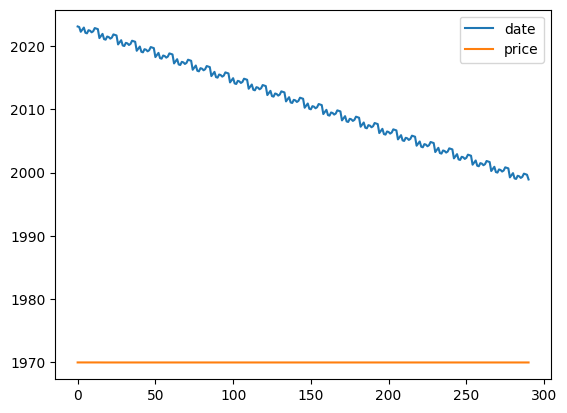

In [89]:
df3.plot()

In [26]:
df.describe()

,Week Ending,watershed_code,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay
count,0.0,291.0,291.000000,1.350000e+02,1.220000e+02,1.830000e+02,1.400000e+01,1.400000e+01,1.340000e+02,183.000000
mean,NaN,0.0,0.949529,4.671931e+07,1.900354e+08,8.225300e+09,8.805714e+09,1.213872e+08,4.851732e+07,2309.278689
std,NaN,0.0,0.487655,5.473522e+06,1.419773e+07,0.000000e+00,2.683022e+08,2.224575e+07,5.929576e+06,87.751359
min,NaN,0.0,0.446000,3.417800e+07,1.485300e+08,8.225300e+09,8.463000e+09,9.959600e+07,3.596800e+07,2024.000000
25%,NaN,0.0,0.642500,4.217300e+07,1.818470e+08,8.225300e+09,8.564550e+09,1.043600e+08,4.378825e+07,2259.500000
50%,NaN,0.0,0.831000,4.707200e+07,1.905275e+08,8.225300e+09,8.732700e+09,1.076054e+08,4.833900e+07,2317.000000
75%,NaN,0.0,1.080000,5.028300e+07,1.984330e+08,8.225300e+09,9.031050e+09,1.373939e+08,5.206150e+07,2367.500000
max,NaN,0.0,4.490000,5.997000e+07,2.242760e+08,8.225300e+09,9.222100e+09,1.640673e+08,6.231900e+07,2465.000000


In [27]:
df.dtypes

Program                object
Year                   object
Month                  object
day                    object
Week Ending           float64
Geo Level              object
State                  object
watershed_code          int64
Commodity              object
Data Item              object
Domain                 object
Domain Category        object
price                 float64
chicken               float64
broken eggs           float64
production eggs       float64
chicken production    float64
chicken died          float64
Hatch chicken         float64
chicken lay           float64
date                   object
dtype: object

In [28]:

df_with_numeric_features = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
print("Numeric features:")
for col in df_with_numeric_features:
    print(f"{col}")

Numeric features:
Week Ending
watershed_code
price
chicken
broken eggs
production eggs
chicken production
chicken died
Hatch chicken
chicken lay


pull non-numeric features

In [29]:

df_with_non_numeric_features = df.select_dtypes(include=['object'])
print("Non-numeric columns:")
for col in df_with_non_numeric_features:
    print(f"{col}")

Non-numeric columns:
Program
Year
Month
day
Geo Level
State
Commodity
Data Item
Domain
Domain Category
date


Remove duplicates
Never assume there are no duplicates in your data!

In [30]:
column_names = df.columns.tolist()
column_names

['Program',
 'Year',
 'Month',
 'day',
 'Week Ending',
 'Geo Level',
 'State',
 'watershed_code',
 'Commodity',
 'Data Item',
 'Domain',
 'Domain Category',
 'price',
 'chicken',
 'broken eggs',
 'production eggs',
 'chicken production',
 'chicken died',
 'Hatch chicken',
 'chicken lay',
 'date']

In [31]:
#remove duplicates rows

df.drop_duplicates(subset=column_names, keep='last', inplace=True)
print("Number of rows after removing duplicates", len(df))


Number of rows after removing duplicates 291


Drop null values from month column.


In [32]:
df.dropna(subset = ["date"], inplace=True)


In [33]:
df2 = pd.read_csv("/content/drive/MyDrive/The Eggcellent Predictor /Data/eggprice2.csv", parse_dates = ['Month'], index_col = ['Month'])
df2.head()


,Program,Year,day,Week Ending,Geo Level,State,watershed_code,Commodity,Data Item,Domain,Domain Category,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay
Month,,,,,,,,,,,,,,,,,,,
2,SURVEY,2023,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.61,"50,031,000","181,566,000","8,225,300,000",NaN,NaN,"52,048,000","2,171"
1,SURVEY,2023,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,3.00,"47,370,000","188,508,000","8,225,300,000",NaN,NaN,"50,748,000","2,413"
4,SURVEY,2022,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.30,"53,971,000","190,571,000","8,225,300,000",NaN,NaN,"50,636,000","2,390"
8,SURVEY,2022,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,1.94,"57,156,000","209,396,000","8,225,300,000",NaN,NaN,"55,991,000","2,449"
12,SURVEY,2022,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,4.49,"49,852,000","181,674,000","8,225,300,000",NaN,NaN,"48,438,000","2,434"


Describe Max and Min of the price 

count    291.000000
mean       0.949529
std        0.487655
min        0.446000
25%        0.642500
50%        0.831000
75%        1.080000
max        4.490000
Name: price, dtype: float64


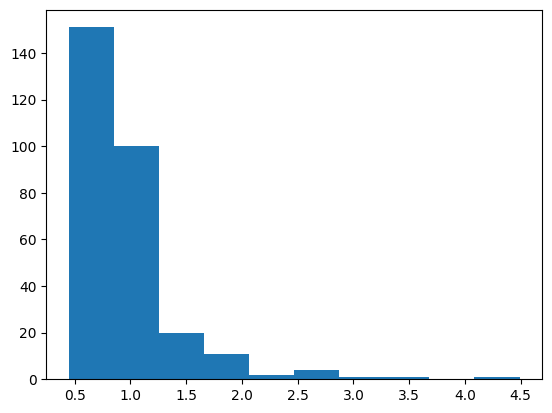

In [34]:
plt.hist(df.price,bins=10)
print(df.price.describe())

In [35]:
df['Year'].value_counts()

2010    12
1999    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2022    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2000    12
2023     2
1998     1
Name: Year, dtype: int64

Graph below shows that when chicken lay is high, the prices are low. (This would a good presentaion visual)

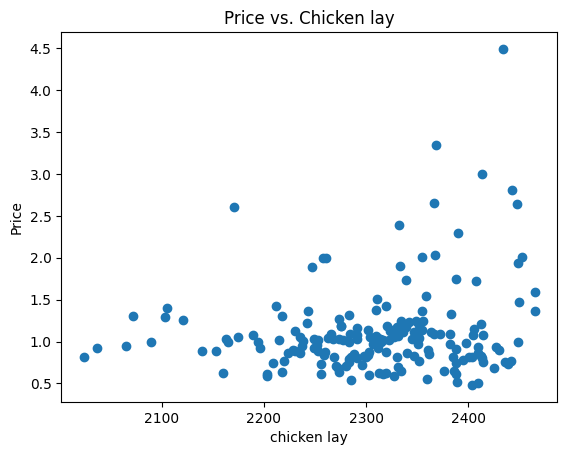

In [36]:
price = df['price']
chicken = df['chicken lay']

# create a scatter plot
plt.scatter(chicken , price)
plt.xlabel('chicken lay')
plt.ylabel('Price')
plt.title('Price vs. Chicken lay')
plt.show()

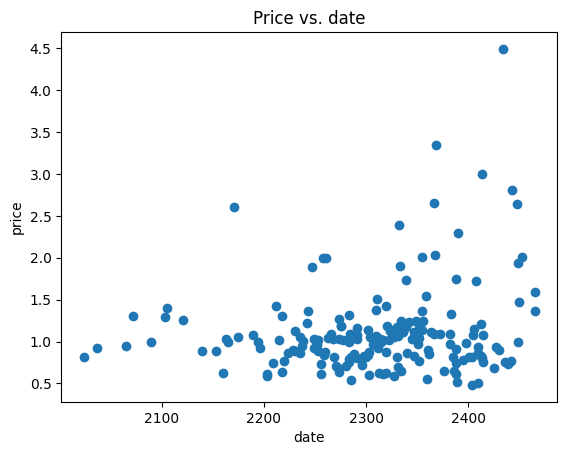

In [38]:
from pandas.core.indexes.datetimes import date
price = df3['price']
date = df3['date']

# create a scatter plot
plt.scatter(chicken , price)
plt.xlabel('date')
plt.ylabel('price')
plt.title('Price vs. date')
plt.show()

check egg price data is stationery or not?

In [39]:
from statsmodels.tsa.stattools import adfuller
x=df3['price']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -3.9388903553782932
p-value 0.0017665650332103608
critical values -21.185750961863675
fail to reject null hypothese h1 , it mean data is stationary


This is stationary meaning that we can use it for the Arima Model. Stationary means? if p value is less than 0.5 

<Axes: >

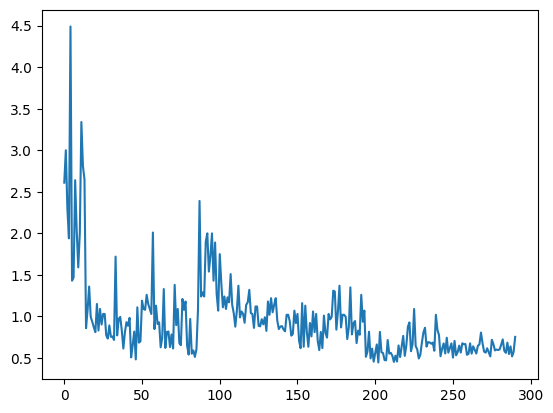

In [40]:
#Now checking data is stationary or not using graphs.
df3['price'].plot()

For ARIMA forcasting we need two parameter q and q that P is  parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.and q is the number of lagged forecast error terms in the prediction equation.now we want to calculate P and q

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


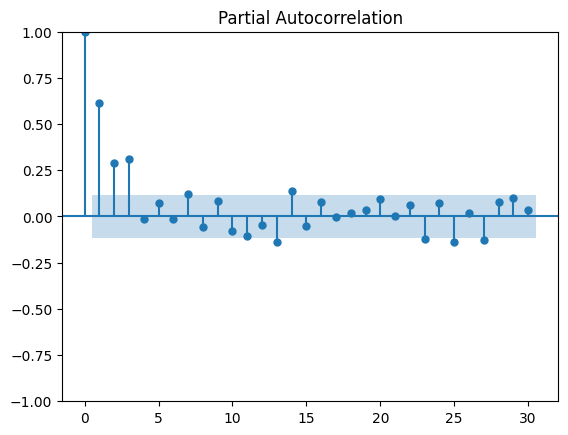

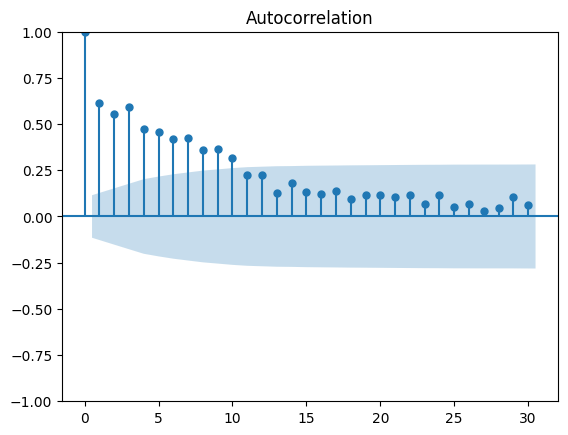

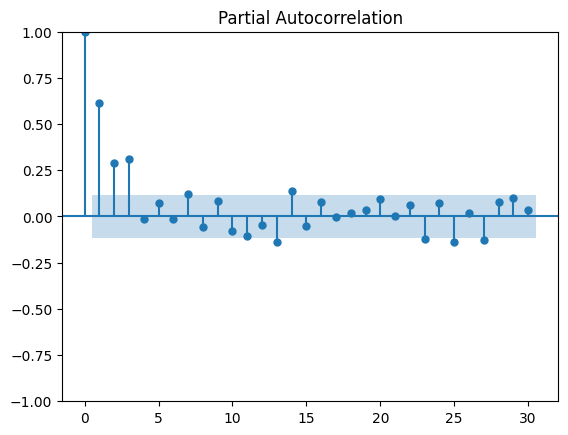

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df3['price'].iloc[1:],lags=30)
plot_pacf(df3['price'].iloc[1:],lags=30)


P=5 and q =5 

#Forecasted Data

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

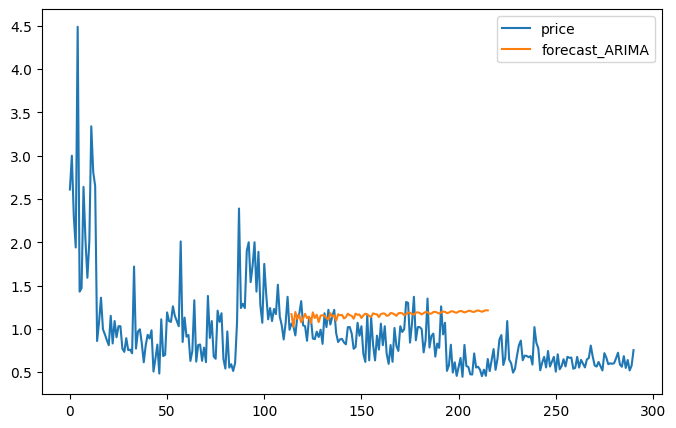

In [42]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df3['price'], order=(5,0,5))
result = model.fit()
df3['forecast_ARIMA'] = result.predict(start = 114, end= 215, dynamic= True)  
df3[['price', 'forecast_ARIMA']].plot(figsize=(8, 5))


Check how SARIMA will perform on this seasonal data.

In [43]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df3['price'],order=(5,0,5),seasonal_order=(5,0,5,12))
result=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

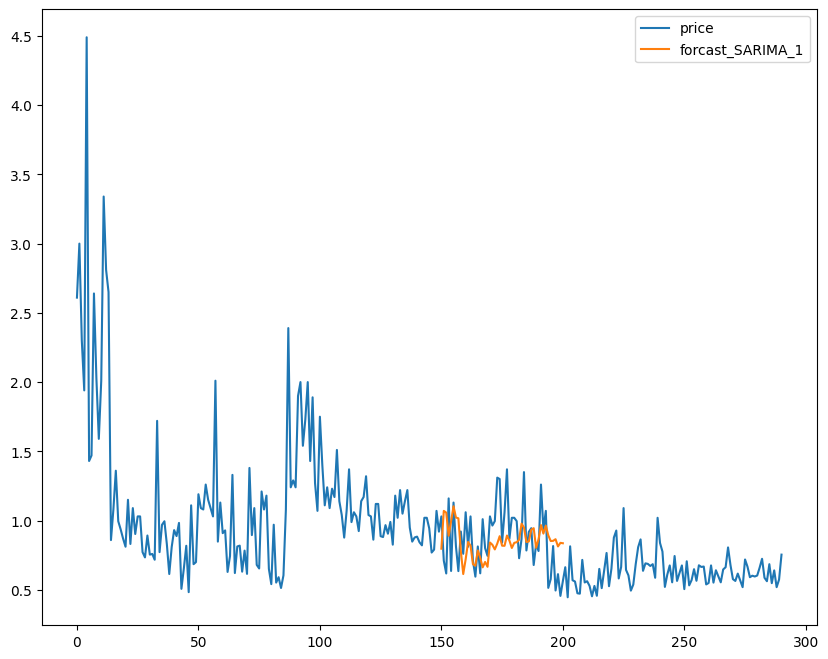

In [44]:
df3['forcast_SARIMA_1']=result.predict(start=150, end=200, dynamic=True)
df3[['price','forcast_SARIMA_1']].plot(figsize=(10, 8))

SARIMA model is working well. because data is seasonal.

So, we are try to predict future forecasting using SARIMA model.



In [90]:

import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= df.columns)
future = pd.DataFrame(columns=df.columns) 
df= pd.concat([df, future])

**Predict future forecasting using SARIMA**

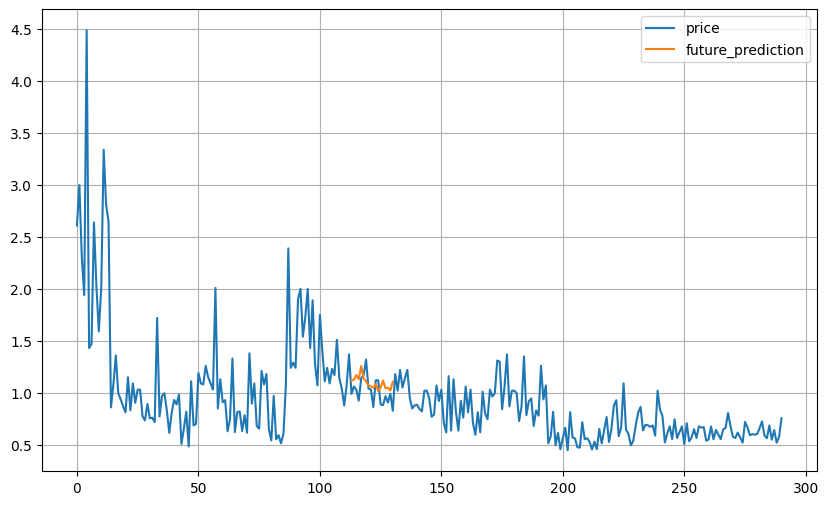

In [91]:
df3['future_prediction']=result.predict(start=113, end=130, dynamic=True)
df3[['price','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

<Axes: >

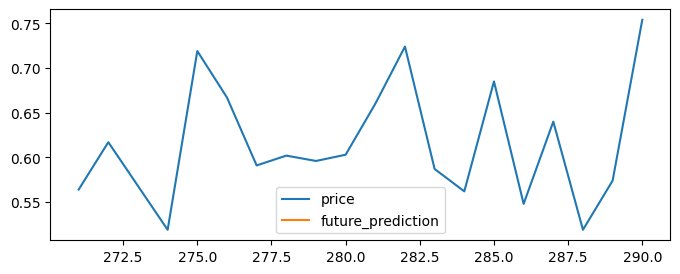

In [94]:
df3['future_prediction'] = result.predict(start=113, end=130, dynamic=True)
df3[['price', 'future_prediction']].iloc[-20:].plot(figsize=(8,3))

checking that te chicken lay is stationaryor not?

In [95]:
from statsmodels.tsa.stattools import adfuller
x=sub_df['chicken lay']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.5197931797957853
p-value 0.5236982060527192
critical values 1073.3300553544575
Reject the null hypotheise , it mean data is not stationary


because p = 0.523 so it is not stationary.so change it to stationary.

In [96]:
df['chicken lay first difference']=df['chicken lay']-df['chicken lay'].shift(1)

<Axes: >

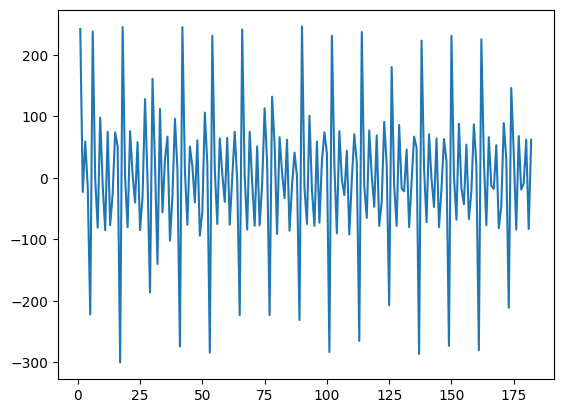

In [97]:
df['chicken lay first difference'].plot()

it is now stationary because all around same number

# DO A CORRELATION MATRIC

In [98]:
#data is missing rows and we trimmed it to 123 because most columns are empty after 123
sub_df =df[['price','chicken lay','broken eggs','production eggs','Hatch chicken']]
sub_df.head()

,price,chicken lay,broken eggs,production eggs,Hatch chicken
0,2.61,2171.0,181566000.0,8.225300e+09,52048000.0
1,3.00,2413.0,188508000.0,8.225300e+09,50748000.0
2,2.30,2390.0,190571000.0,8.225300e+09,50636000.0
3,1.94,2449.0,209396000.0,8.225300e+09,55991000.0
4,4.49,2434.0,181674000.0,8.225300e+09,48438000.0


In [99]:
sub_df.corr()

,price,chicken lay,broken eggs,production eggs,Hatch chicken
price,1.000000,0.182822,-0.277959,NaN,0.015207
chicken lay,0.182822,1.000000,0.481441,NaN,0.262531
broken eggs,-0.277959,0.481441,1.000000,NaN,0.214162
production eggs,NaN,NaN,NaN,NaN,NaN
Hatch chicken,0.015207,0.262531,0.214162,NaN,1.000000


In [100]:
corr_matrix = sub_df.corr()
print(corr_matrix)

                    price  chicken lay  broken eggs  production eggs  \
price            1.000000     0.182822    -0.277959              NaN   
chicken lay      0.182822     1.000000     0.481441              NaN   
broken eggs     -0.277959     0.481441     1.000000              NaN   
production eggs       NaN          NaN          NaN              NaN   
Hatch chicken    0.015207     0.262531     0.214162              NaN   

                 Hatch chicken  
price                 0.015207  
chicken lay           0.262531  
broken eggs           0.214162  
production eggs            NaN  
Hatch chicken         1.000000  


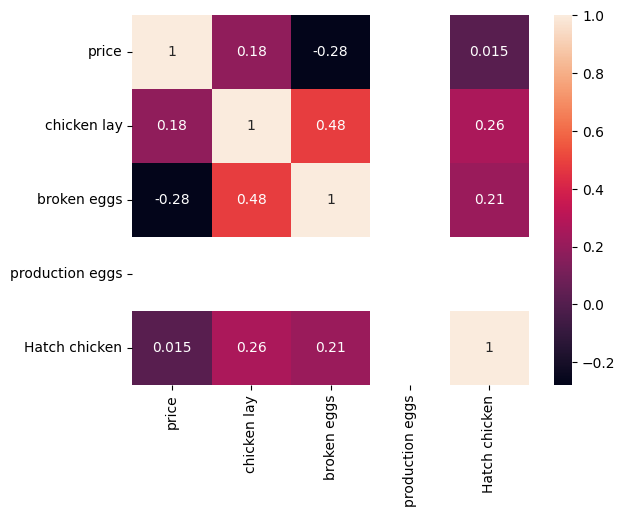

In [101]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# The positive number shows good relationship and negative number shows week relation ship and zero shows no relationship.